In [1]:
from getdata import GetDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data,target = GetDataset(CreateDataFrame=True).Outputdata()

In [3]:
x = np.linspace(data[0][0].min(),data[0][0].max(),901)
data2 = np.zeros((data.shape[0],901))
for i in range(data.shape[0]):
    data2[i,:] = np.interp(x,data[i][0],data[i][1])

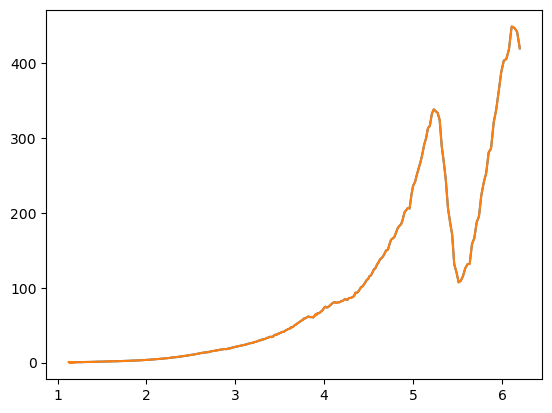

In [4]:
plt.plot(x,data2[600])
plt.plot(data[600][0],data[600][1])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error, max_error

Scorer

In [5]:
MSE_scorer = make_scorer(mean_squared_error,greater_is_better=False)

In [16]:
def TranformData(data):
    datatrans = np.zeros((data.shape[0],12))
    for i,element in enumerate(data):
        # 1. Valor máximo de la curva
        valor_maximo = np.max(element)
        # 2. Área bajo la curva (usando la regla del trapecio)
        area_bajo_curva = np.trapz(element)

        # 3. Tiempo de subida
        tiempo_de_subida = np.argmax(element)

        # 4. Tiempo de decaimiento
        tiempo_de_decaimiento = len(element) - tiempo_de_subida

        # 5. Tiempo medio de vida
        tiempo_medio_vida = (tiempo_de_subida + tiempo_de_decaimiento) / 2

        # 6. Pendiente máxima
        pendiente_maxima = np.max(np.gradient(element))

        # 7. Pendiente mínima
        pendiente_minima = np.min(np.gradient(element))

        # 8. Pendiente promedio
        pendiente_promedio = np.mean(np.gradient(element))


        # 9. Valor medio
        valor_medio = np.mean(element)

        # 10. Desviación estándar
        desviacion_estandar = np.std(element)

        # 11. Asimetría
        asimetria = np.mean((element - valor_medio) ** 3) / (np.std(element) ** 3)

        # 12. Curtosis
        curtosis = np.mean((element - valor_medio) ** 4) / (np.std(element) ** 4)

        dat = np.array([valor_maximo,area_bajo_curva,tiempo_de_subida,tiempo_de_decaimiento,tiempo_medio_vida,pendiente_maxima,pendiente_minima,pendiente_promedio,valor_medio,desviacion_estandar,asimetria,curtosis]).reshape(1,12)
        datatrans[i,:] = dat[:]
    columns = ['Valor_Maximo','ABC','Timp_Subida','Timp_Bajada','Timp_Med','Pendiente_Max','Pendiente_Min','Pendiente_Med','Valor_Medio','Desv_est','Asimetria','Curtosis']
    datat = pd.DataFrame(datatrans,columns=columns)
    return datat

new_data_frame = TranformData(data2)
new_data_array = np.array(new_data_frame)

In [25]:
new_data_frame.describe()

,Valor_Maximo,ABC,Timp_Subida,Timp_Bajada,Timp_Med,Pendiente_Max,Pendiente_Min,Pendiente_Med,Valor_Medio,Desv_est,Asimetria,Curtosis
count,3090.000000,3.090000e+03,3090.000000,3090.000000,3090.0,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,1202.183193,3.662693e+05,751.368285,149.631715,450.5,40.197848,-44.595393,0.786947,406.911891,382.481104,0.671907,2.608289
std,1001.713605,3.159178e+05,89.153203,89.153203,0.0,163.138313,121.380720,0.696142,350.908656,326.911142,0.610922,7.755203
min,16.068455,2.896662e+03,0.000000,1.000000,450.5,0.264611,-4529.952143,-2.117993,3.242831,3.552618,-0.210522,1.282336
25%,533.233176,1.359099e+05,705.000000,169.000000,450.5,9.284539,-49.652105,0.397551,151.137491,156.776614,0.408608,1.656719
50%,909.313800,2.757352e+05,713.000000,188.000000,450.5,19.219254,-24.893552,0.611389,306.543135,280.524811,0.485585,1.873081
75%,1628.887150,5.225830e+05,732.000000,196.000000,450.5,41.592740,-13.402031,0.958095,580.429303,530.057951,0.706357,2.393365
max,9702.678349,3.067414e+06,900.000000,901.000000,450.5,7282.490662,-0.014624,8.420333,3407.538707,3080.809199,16.942606,416.819460


Lista completa de caracteristica (12)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(new_data_array, target, test_size=0.2, random_state=42, shuffle=True)


In [47]:
model_DT = DecisionTreeRegressor(max_depth=10,min_samples_split=2,min_samples_leaf=8,max_features=None) #0.2766
model_DT.fit(X_train, y_train).predict(X_test)

In [21]:
model_RF = RandomForestRegressor(n_estimators=800,max_depth=None,min_samples_leaf=2,min_samples_split=2,max_features=None) #0.206
model_RF.fit(X_train, y_train).predict(X_test)

Mejores parámetros: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 800}
Mejor puntaje: 0.20621006625295496


In [27]:
model_mlp = MLPRegressor(max_iter=1000,activation='logistic',hidden_layer_sizes=(250,),solver='adam',learning_rate='adaptive') #0.423
model_mlp.fit(X_train, y_train).predict(X_test)


Mejores parámetros: {'activation': 'logistic', 'hidden_layer_sizes': (250,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Mejor puntaje: 0.4239934609913896


Extracción de caracteristica

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import visuals as vs
min_data = MinMaxScaler().fit_transform(new_data_array)
pt_data = PowerTransformer(method='yeo-johnson').fit_transform(min_data)
X_train2, X_test2, y_train2, y_test2 = train_test_split(pt_data, target, test_size=0.2, random_state=42, shuffle=True)

In [38]:
pca = PCA(n_components=3)
id = pca.fit_transform(X_train2)
X_test2_pca = pca.transform(X_test2)

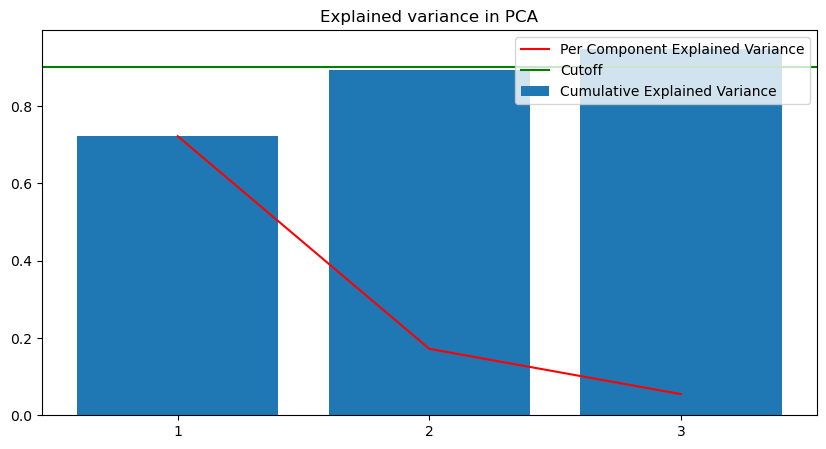

In [42]:
plt.figure(figsize=(10,5))
plt.plot(range(1,4),pca.explained_variance_ratio_, c='red', label='Per Component Explained Variance')
plt.bar(range(1,4), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,4))
plt.legend(loc=1)
plt.show()

,Explained Variance,Valor_Maximo,ABC,Timp_Subida,Timp_Bajada,Timp_Med,Pendiente_Max,Pendiente_Min,Pendiente_Med,Valor_Medio,Desv_est,Asimetria,Curtosis
Dimension 1,0.7218,0.3378,0.3482,-0.2424,0.2404,0.0,0.3242,-0.3256,0.2561,0.3482,0.3439,-0.2434,-0.2695
Dimension 2,0.1718,-0.1859,-0.0831,-0.4695,0.4710,-0.0,-0.2124,0.1841,-0.4075,-0.0834,-0.1444,-0.3878,-0.3050
Dimension 3,0.0547,0.0973,-0.0147,-0.4080,0.4268,0.0,0.0757,-0.1691,-0.1250,-0.0147,0.0189,0.5614,0.5254


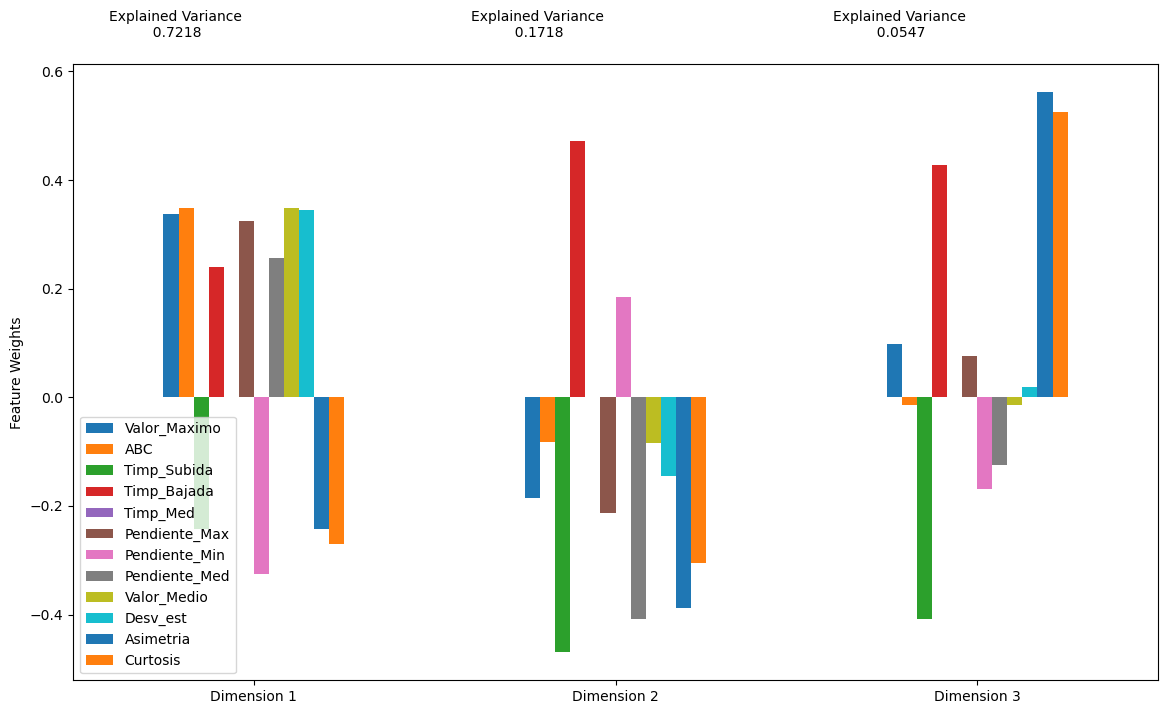

In [43]:
vs.pca_results(pd.DataFrame(X_train2,columns=new_data_frame.columns),pca,3)

In [50]:
model_DT = DecisionTreeRegressor(max_depth=5,max_features=None,min_samples_leaf=4,min_samples_split=10) #0.33
y_pred = model_DT.fit(id, y_train).predict(X_test2_pca)
print(mean_squared_error(y_pred=y_pred,y_true=y_test2))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test2))

0.32256339877722723
0.46264457298607237


In [52]:
model_RF = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_leaf=1,min_samples_split=3,max_features='sqrt')
model_RF.fit(id, y_train).predict(X_test2_pca)

Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Mejor puntaje: 0.30491773733519634
